<a href="https://colab.research.google.com/github/Parth-del721/CODSOFT/blob/main/TitanicSurivivalPredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1:Upload the Dataset to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


## Step 2:Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 3:Load the Dataset

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 4:Clean & Preprocess the Data

In [ ]:
# Drop unnecessary columns
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical columns
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])         # male = 1, female = 0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])


## Step 5:Visualizations

5.1 Survival Count

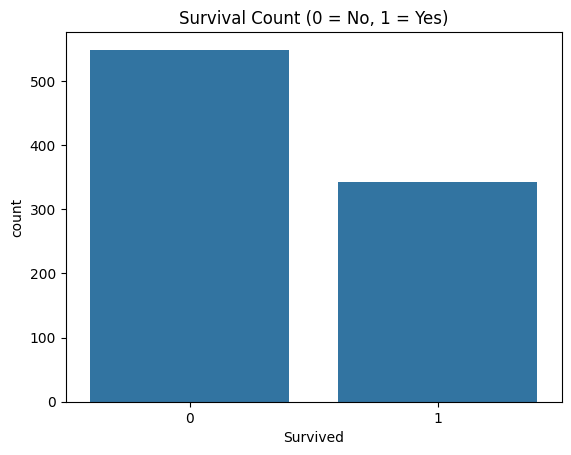

In [ ]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

5.2 Survival by Gender

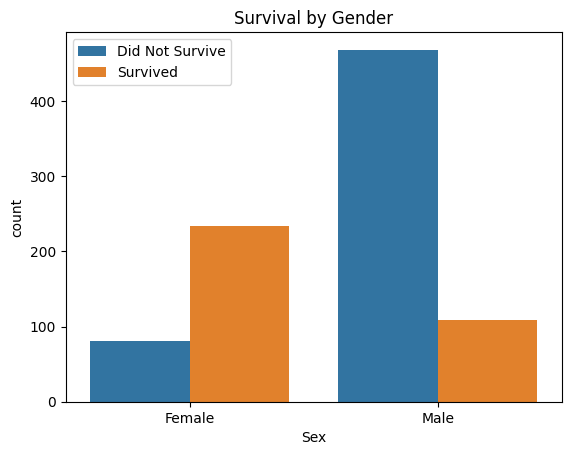

In [ ]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

5.3 Survival by Class

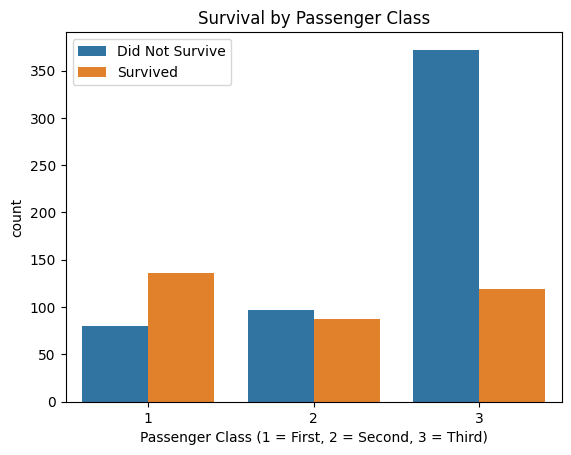

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

5.4 Age Distribution by Survival

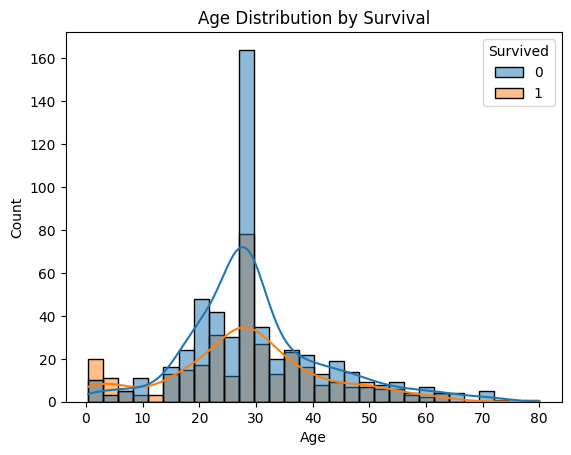

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

## Step 6:Model Building

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Step 7: Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]


Feature Importance

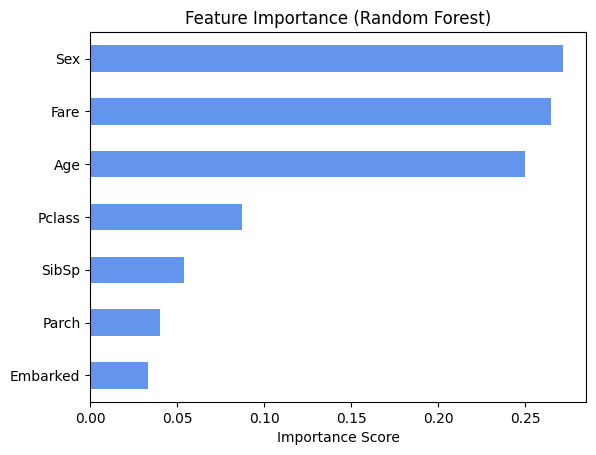

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()
